# 25934 Applied Financial Econometrics - Empirical Project 2
#### `Name: Lachlan O'Malley`
#### `Student ID: 13227133`
___


### Import Statements

In [1]:
import functions as f

In [2]:
import  pylab as pl
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans
import pandas as pd
import pandas_datareader as dr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import plotly.graph_objects as go
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
import statsmodels
# we will use `smf` and `sm` to constract and estimate same regressions but using different ways
import statsmodels.formula.api as smf  
import statsmodels.api as sm
import statsmodels.stats.api as sms
from patsy import dmatrices
from sklearn.metrics import mean_squared_error
from pandas_datareader import data
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.tsa.api as smt
import pickle
import warnings
warnings.filterwarnings('ignore')
import  pylab as pl
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans
import pandas as pd
import pandas_datareader as dr
from matplotlib import pyplot as plt

sns.set(color_codes=True)
sns.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=500)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)


***

### **Part 1: Loading the Data**

#### 1 (a) S&P ASX 200

In [3]:
# Australia - S&P/ASX 200
#index_url = 'https://en.wikipedia.org/wiki/S%26P/ASX_200'
#ticker_column_name='Code' #'Ticker' 'EPIC'
#yahoo_suffix='.AX' #'.L'
#table_idx= 0 #1
#start_date = '01/01/2015'
#end_date = '03/11/2022'

In [4]:
# UK - FTSE 100
index_url = 'https://en.wikipedia.org/wiki/FTSE_100_Index#Current_constituents'
ticker_column_name='EPIC' #'Ticker' 'EPIC'
yahoo_suffix='.L' #'.L'
table_idx= 3 #1
start_date = '01/01/2015'
end_date = '03/11/2022'

In [5]:
# read in the url and scrape ticker data
data_table = pd.read_html(index_url,keep_default_na=False)
# Option keep_default_na=False prevents pandas from reading “NA” as NaN
# This came up when reading in TSX data for ticker "NA" for National Bank of Canada. The ticker was read as nan value

# get the list of ticker symbols
tickers = data_table[table_idx][ticker_column_name].tolist()

***

#### 1 (b) Split into In-Sample and Out-of-Sample: Market Constituents

In [6]:
#raw_c = ticker_download(index_url, ticker_column_name, yahoo_suffix, table_idx, start_date, end_date)

In [7]:
#raw_c.to_csv('FTSE100_prices_csv', index=True)

Saved the ticker download as a CSV file.

In [8]:
raw_c = pd.read_csv('FTSE100_prices_csv',parse_dates=['Date']).set_index(['Date']) 
raw_c

III.L      ABDN.L        ADM.L       AAF.L        AAL.L  \
Date                                                                        
2014-12-31   449.134766  556.463379  1319.595703         NaN  1191.919434   
2015-01-02   452.925720  555.906860  1312.608765         NaN  1176.530273   
2015-01-05   441.353210  538.799927  1300.630615         NaN  1118.448242   
2015-01-06   432.175049  531.428711  1290.648560         NaN  1146.744507   
2015-01-07   424.692780  537.687256  1302.626587         NaN  1144.758667   
...                 ...         ...          ...         ...          ...   
2022-03-07  1138.500000  179.149994  2443.000000  127.900002  3855.500000   
2022-03-08  1143.500000  179.899994  2464.000000  129.300003  3832.500000   
2022-03-09  1232.000000  190.750000  2439.000000  137.600006  3753.500000   
2022-03-10  1217.500000  189.300003  2481.000000  139.800003  3818.500000   
2022-03-11  1242.000000  193.100006  2568.000000  139.800003  3900.000000   

                 ANTO.L        AHT.L        ABF.L        AZN.L      AUTO.L  \
Date                                                                         
2014-12-31   751.216003  1150.731323  3150.296631  4542.932129         NaN   
2015-01-02   746.723816  1163.717285  3191.261475  4567.364258         NaN   
2015-01-05   720.767944  1180.698364  3093.345703  4570.855957         NaN   
2015-01-06   716.275757  1107.778687  3085.351807  4476.117188         NaN   
2015-01-07   718.272400  1107.778687  3051.381836  4467.142578         NaN   
...                 ...          ...          ...          ...         ...   
2022-03-07  1545.500000  4644.000000  1673.500000  8651.000000  634.400024   
2022-03-08  1518.000000  4567.000000  1626.500000  8747.000000  626.000000   
2022-03-09  1498.000000  4902.000000  1747.500000  9121.000000  669.400024   
2022-03-10  1568.000000  4742.000000  1715.500000  9219.000000  647.799988   
2022-03-11  1576.000000  4891.000000  1699.000000  9275.000000  643.799988   

            ...        SSE.L      STAN.L        STJ.L        TW.L      TSCO.L  \
Date        ...                                                                 
2014-12-31  ...  1021.539856  766.665100   608.526306   84.577560  174.984497   
2015-01-02  ...  1011.462952  766.028198   604.417053   82.797638  174.058609   
2015-01-05  ...   997.607422  754.086426   588.727661   82.122482  168.133209   
2015-01-06  ...  1007.684204  754.006653   573.785278   80.465309  165.540878   
2015-01-07  ...  1007.684204  765.709717   573.411865   81.263199  168.503586   
...         ...          ...         ...          ...         ...         ...   
2022-03-07  ...  1593.000000  450.399994  1200.000000  130.550003  272.799988   
2022-03-08  ...  1608.000000  463.700012  1180.000000  127.900002  266.049988   
2022-03-09  ...  1681.000000  493.100006  1317.000000  133.699997  274.799988   
2022-03-10  ...  1672.000000  489.600006  1300.500000  130.699997  274.100006   
2022-03-11  ...  1648.000000  487.600006  1322.000000  134.399994  272.750000   

                 ULVR.L         UU.L       VOD.L        WTB.L        WPP.L  
Date                                                                        
2014-12-31  2077.875000   688.312500  148.104691  3661.449707   989.509277  
2015-01-02  2060.480957   690.191040  147.605820  3620.767090   987.302551  
2015-01-05  2034.389038   685.306824  143.980515  3598.506836   974.795532  
2015-01-06  2035.179077   676.289490  143.248795  3534.028320   962.288757  
2015-01-07  2048.621094   698.081177  143.681183  3561.662109   973.324097  
...                 ...          ...         ...          ...          ...  
2022-03-07  3328.000000  1052.500000  120.919998  2473.000000   919.000000  
2022-03-08  3336.500000  1049.000000  116.459999  2436.000000   947.799988  
2022-03-09  3434.000000  1077.000000  119.940002  2650.000000   998.000000  
2022-03-10  3364.500000  1073.000000  118.480003  2594.000000   993.200012  
2022-03-11  3391.500000

In [9]:
raw_c.shape

(1821, 100)

In [10]:
data_table;

In [11]:
#sector = data_table[0][['Code', 'Sector']]
#sector

In [12]:
#In-sample period
in_sam_c = raw_c['01/01/2015':'12/31/2020']
in_sam_c.head()

III.L      ABDN.L        ADM.L  AAF.L        AAL.L  \
Date                                                                  
2015-01-02  452.925720  555.906860  1312.608765    NaN  1176.530273   
2015-01-05  441.353210  538.799927  1300.630615    NaN  1118.448242   
2015-01-06  432.175049  531.428711  1290.648560    NaN  1146.744507   
2015-01-07  424.692780  537.687256  1302.626587    NaN  1144.758667   
2015-01-08  431.975433  550.482727  1334.568604    NaN  1172.558594   

                ANTO.L        AHT.L        ABF.L        AZN.L  AUTO.L  ...  \
Date                                                                   ...   
2015-01-02  746.723816  1163.717285  3191.261475  4567.364258     NaN  ...   
2015-01-05  720.767944  1180.698364  3093.345703  4570.855957     NaN  ...   
2015-01-06  716.275757  1107.778687  3085.351807  4476.117188     NaN  ...   
2015-01-07  718.272400  1107.778687  3051.381836  4467.142578     NaN  ...   
2015-01-08  744.727112  1129.754517  3093.345703  4559.887695     NaN  ...   

                  SSE.L      STAN.L       STJ.L       TW.L      TSCO.L  \
Date                                                                     
2015-01-02  1011.462952  766.028198  604.417053  82.797638  174.058609   
2015-01-05   997.607422  754.086426  588.727661  82.122482  168.133209   
2015-01-06  1007.684204  754.006653  573.785278  80.465309  165.540878   
2015-01-07  1007.684204  765.709717  573.411865  81.263199  168.503586   
2015-01-08  1007.684204  772.795349  594.331055  81.508713  193.732773   

                 ULVR.L        UU.L       VOD.L        WTB.L        WPP.L  
Date                                                                       
2015-01-02  2060.480957  690.191040  147.605820  3620.767090   987.302551  
2015-01-05  2034.389038  685.306824  143.980515  3598.506836   974.795532  
2015-01-06  2035.179077  676.289490  143.248795  3534.028320   962.288757  
2015-01-07  2048.621094  698.081177  143.681183  3561.662109   973.324097  
2015-01-08  2109.502197  707.849731  150.166794  3633.816650  1001.280457  

[5 rows x 100 columns]

In [13]:
#Out-of-sample period
out_sam_c = raw_c['01/01/2021':'03/11/2022']
out_sam_c.tail()

III.L      ABDN.L   ADM.L       AAF.L   AAL.L  ANTO.L   AHT.L  \
Date                                                                         
2022-03-07  1138.5  179.149994  2443.0  127.900002  3855.5  1545.5  4644.0   
2022-03-08  1143.5  179.899994  2464.0  129.300003  3832.5  1518.0  4567.0   
2022-03-09  1232.0  190.750000  2439.0  137.600006  3753.5  1498.0  4902.0   
2022-03-10  1217.5  189.300003  2481.0  139.800003  3818.5  1568.0  4742.0   
2022-03-11  1242.0  193.100006  2568.0  139.800003  3900.0  1576.0  4891.0   

             ABF.L   AZN.L      AUTO.L  ...   SSE.L      STAN.L   STJ.L  \
Date                                    ...                               
2022-03-07  1673.5  8651.0  634.400024  ...  1593.0  450.399994  1200.0   
2022-03-08  1626.5  8747.0  626.000000  ...  1608.0  463.700012  1180.0   
2022-03-09  1747.5  9121.0  669.400024  ...  1681.0  493.100006  1317.0   
2022-03-10  1715.5  9219.0  647.799988  ...  1672.0  489.600006  1300.5   
2022-03-11  1699.0  9275.0  643.799988  ...  1648.0  487.600006  1322.0   

                  TW.L      TSCO.L  ULVR.L    UU.L       VOD.L   WTB.L  \
Date                                                                     
2022-03-07  130.550003  272.799988  3328.0  1052.5  120.919998  2473.0   
2022-03-08  127.900002  266.049988  3336.5  1049.0  116.459999  2436.0   
2022-03-09  133.699997  274.799988  3434.0  1077.0  119.940002  2650.0   
2022-03-10  130.699997  274.100006  3364.5  1073.0  118.480003  2594.0   
2022-03-11  134.399994  272.750000  3391.5  1052.5  119.500000  2666.0   

                  WPP.L  
Date                     
2022-03-07   919.000000  
2022-03-08   947.799988  
2022-03-09   998.000000  
2022-03-10   993.200012  
2022-03-11  1005.000000  

[5 rows x 100 columns]

***

#### 1 (c) Split into In-Sample and Out-of-Sample: Market index ^AXJO

In [14]:
raw_m = f.index_download(ticker='ISF.L', start_date='01/01/2015', end_date = '03/11/2022')
raw_m.tail()

ISF.L
Date                  
2022-03-07  683.900024
2022-03-08  685.400024
2022-03-09  708.799988
2022-03-10  701.599976
2022-03-11  706.000000

In [15]:
#In-sample period
in_sam_m = raw_m['01/01/2015':'12/31/2020'] 
in_sam_m.tail()

ISF.L
Date                  
2020-12-23  639.400024
2020-12-24  641.000000
2020-12-29  650.200012
2020-12-30  646.099976
2020-12-31  636.200012

In [16]:
#Out-of-sample period
out_sam_m = raw_m['01/01/2021':'03/11/2022']
out_sam_m.tail()

ISF.L
Date                  
2022-03-07  683.900024
2022-03-08  685.400024
2022-03-09  708.799988
2022-03-10  701.599976
2022-03-11  706.000000

### **Part 2: Data Pre-Processing and Exploratory Data Analysis**

`Note: For visibility, ease and accuracy all data has been pre-processed prior to being split into subsamples again. `

#### 2(a) Steps to Pre-Prosessing 

1. **Basic Data Cleaning**
* Dealing with data types: Fortunately with financial data (Adjusted Close Prices) Python can handle numeric features easily
* Handling missing data: Models cannot handle missing data.
    * **Simple Solution**
    * Remove observations that have missing information... this can be very problematic if not addressed appropriately as:
        * Data randomly missing can cause you to potentially lose a lot of data
        * If the data is non-randomly missing; meaning it is missing for a reason, you are introducing potential biases, and additionally losing more data.
    * **Best alternative: Imputation**
        * Replace missing values with another value through interpolation or extrapolation
        * Strategies: mean, median, high frequency value, forward-fill, back-fill
 
2. **Data Exploration**
* Outlier detection: Important exploratory technique as it demonstrates how an outlier deviates from other observations in a dataset 
    * **Why is it problematic?**
        * It isn't necessarily problematic, but it can skew model by affecting the slope
        * Can display errors: May be due to poor quality of scraping method, human error inputting values or another issue
    * **Approaches to detect outliers**
        * Distribution, Boxplots
        * Treat the same as data cleaning; we can remove, use imputation or windsorise.

***

**1. Basic Data Cleaning**

In [17]:
#How much of our data is missing??? 
raw_c.isna().sum().sort_values(ascending=False)

MNG.L     1215
AAF.L     1136
AVST.L     849
PSH.L      555
AUTO.L      55
          ... 
HL.L         0
HLMA.L       0
GSK.L        0
FRES.L       0
ITV.L        0
Length: 100, dtype: int64

In [18]:
raw_c.isna().sum().sum()

3872

In [19]:
percent_missing = raw_c.isnull().sum() * 100 / len(raw_c)
percent_missing.sort_values(inplace=True)
percent_missing

III.L      0.000000
FRES.L     0.000000
GSK.L      0.000000
SMT.L      0.000000
HLMA.L     0.000000
            ...    
AUTO.L     3.020319
PSH.L     30.477759
AVST.L    46.622735
AAF.L     62.383306
MNG.L     66.721582
Length: 100, dtype: float64

Assuming perfect foresight, it would be inappropriate to retain stocks with limited data availability for the entire period (in and out of sample). Another reason for why i have not not split the data during pre-processing given that some companies have not been included for the entire 7 year timeframe. Significant gaps in price data leads me to believe that the best approach to mitigate this issue would be to remove any stock with significant data missing.

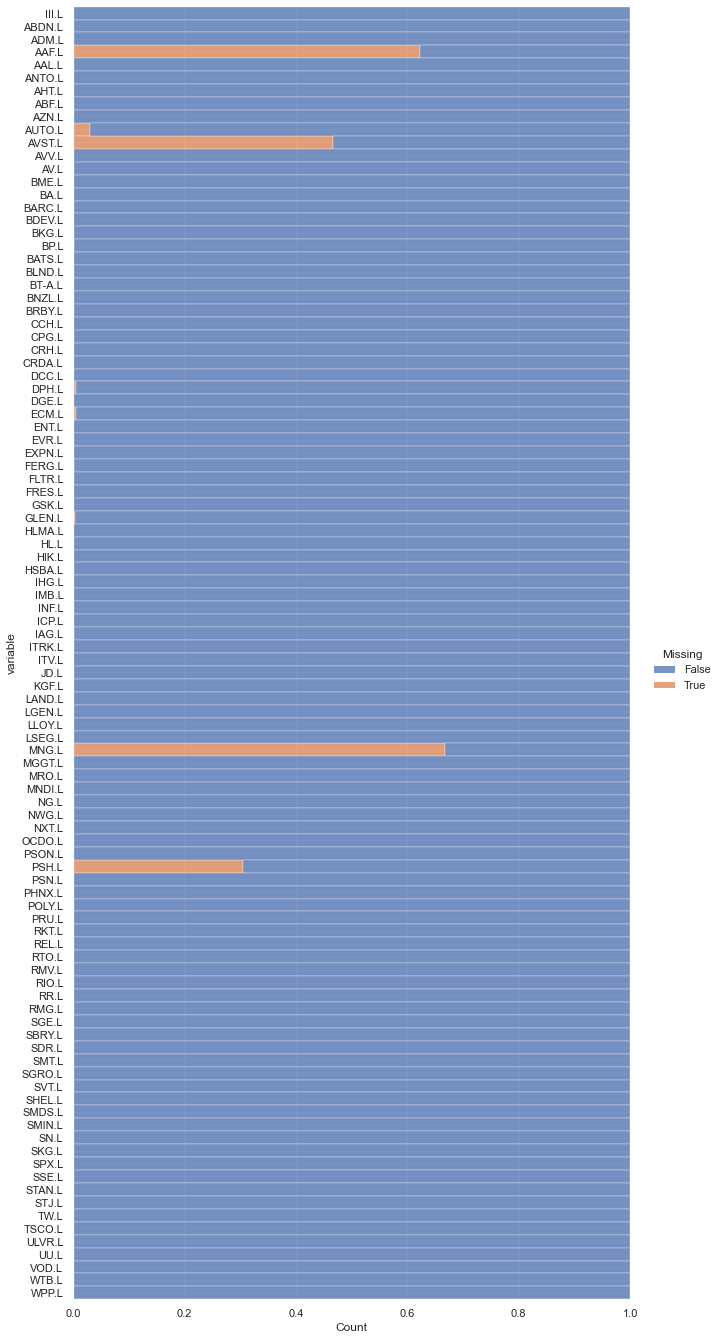

In [20]:
# Visually inspecting missing values
data_dist=sns.displot(
    data=raw_c.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    aspect=2)
data_dist.fig.set_size_inches(10, 22)
plt.show()

In [21]:
#We know each stock has 1821 observations
0.025* len(raw_c) #Therefore, i will remove any stock which has approx 50 missing values or 2.5% of observations which are missing

45.525000000000006

In [22]:
# Remove all stocks with greater than 50 missing values (2.5% of observations)
market_prices = raw_c.dropna(axis=1, thresh = len(raw_c) - 50)

In [23]:
market_prices.isna().sum().sum() #Number of remaining missing values once stocks have been removed

62

In [24]:
#We can observe that 5 stocks have been removed from FTSE100
market_prices.shape

(1821, 95)

Interpolation using Forward fill will enter the previous entry into the unknown value... important for financial data as it is the least pervasive way to still get (reasonably) true reflections of return movements.

In [25]:
m_price = market_prices.ffill().bfill()
m_price.isna().sum().sum() #Check to see if we have any n/a values

0

In [26]:
#Check data cleaning for Market index ETF. Fortunately no missing values!
raw_m.isna().sum().sum()

0

***

#### **2 (b) Converting price to Simple Returns**


In [27]:
con_ret = f.price2ret(m_price)
con_ret.tail()

III.L    ABDN.L     ADM.L     AAL.L    ANTO.L     AHT.L  \
Date                                                                     
2022-03-07 -0.014286  0.000838 -0.024750  0.007184  0.008812  0.011104   
2022-03-08  0.004392  0.004186  0.008596 -0.005966 -0.017794 -0.016581   
2022-03-09  0.077394  0.060311 -0.010146 -0.020613 -0.013175  0.073352   
2022-03-10 -0.011769 -0.007602  0.017220  0.017317  0.046729 -0.032640   
2022-03-11  0.020123  0.020074  0.035067  0.021343  0.005102  0.031421   

               ABF.L     AZN.L     AVV.L      AV.L  ...     SSE.L    STAN.L  \
Date                                                ...                       
2022-03-07 -0.020486 -0.003226  0.025370 -0.031799  ... -0.001254 -0.040068   
2022-03-08 -0.028085  0.011097  0.001237  0.031776  ...  0.009416  0.029529   
2022-03-09  0.074393  0.042758  0.072076  0.045807  ...  0.045398  0.063403   
2022-03-10 -0.018312  0.010744 -0.025355  0.002722  ... -0.005354 -0.007098   
2022-03-11 -0.009618  0.006074 -0.003153  0.010859  ... -0.014354 -0.004085   

               STJ.L      TW.L    TSCO.L    ULVR.L      UU.L     VOD.L  \
Date                                                                     
2022-03-07 -0.026369 -0.019159 -0.009261 -0.024190 -0.000475 -0.020573   
2022-03-08 -0.016667 -0.020299 -0.024743  0.002554 -0.003325 -0.036884   
2022-03-09  0.116102  0.045348  0.032889  0.029222  0.026692  0.029882   
2022-03-10 -0.012528 -0.022438 -0.002547 -0.020239 -0.003714 -0.012173   
2022-03-11  0.016532  0.028309 -0.004925  0.008025 -0.019105  0.008609   

               WTB.L     WPP.L  
Date                            
2022-03-07 -0.030956 -0.020465  
2022-03-08 -0.014962  0.031338  
2022-03-09  0.087849  0.052965  
2022-03-10 -0.021132 -0.004810  
2022-03-11  0.027756  0.011881  

[5 rows x 95 columns]

In [28]:
mar_ret = f.price2ret(raw_m)
mar_ret.tail()

ISF.L
Date                
2022-03-07 -0.004512
2022-03-08  0.002193
2022-03-09  0.034141
2022-03-10 -0.010158
2022-03-11  0.006271

***

#### **Data Exploration** 

**Outliers and Distribution**

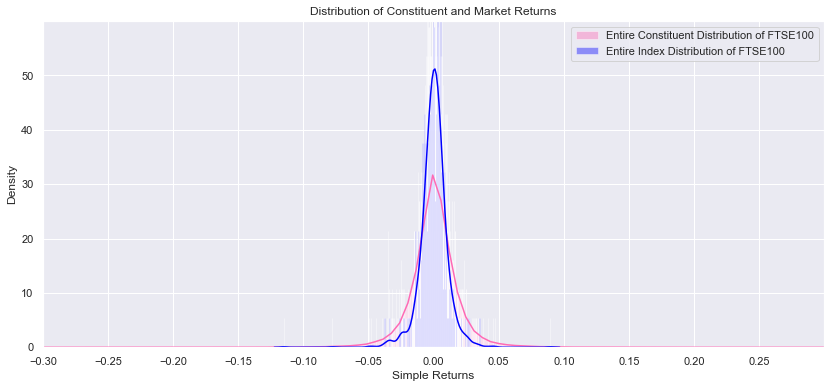

In [29]:
#Distribution of simple returns
plt.figure(figsize=(14,6))
sns.distplot(con_ret, bins=2000, color='hotpink', label='Entire Constituent Distribution of FTSE100'); 
sns.distplot(mar_ret, bins=2000, color='blue', label='Entire Index Distribution of FTSE100');
plt.yticks(np.arange(0,60,10));
plt.xticks(np.arange(-0.3,0.3,0.05));
plt.ylim(0,60);
plt.xlim(-0.3,0.3);
plt.title('Distribution of Constituent and Market Returns')
plt.xlabel('Simple Returns')
plt.legend();

**Distribution Plot** 
* The plot shows normal distribution with extreme outliers (thin tails). While the outliers shouldn't skew our dataset ***considerably** we will windsorise the outliers. Consequently, this decreases the variance with the hope that our results become statistically significant.

In [30]:
con_ret.fillna(0, inplace=True)
con_ret.clip(lower=-0.3,upper=0.3, inplace=True) #Any simple return greater than 30% on any given day will be capped

In [31]:
mar_ret.fillna(0, inplace=True)
mar_ret.clip(lower=-0.05,upper=0.05, inplace=True) #Any simple return greater than 5% on any given day will be capped

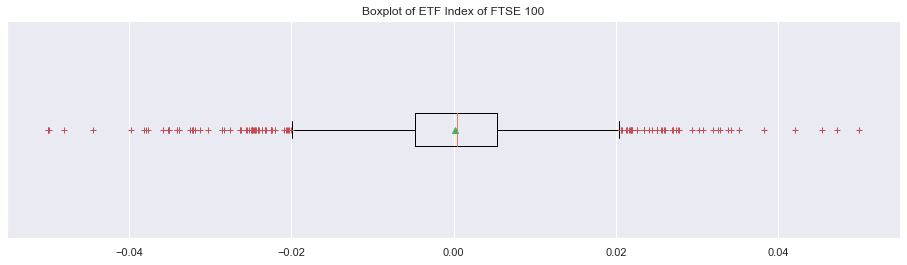

In [32]:
plt.figure(figsize=(16,4))
plt.title('Boxplot of ETF Index of FTSE 100')
plt.boxplot(mar_ret, showmeans=True, vert=False, sym='r+');
plt.yticks([]);

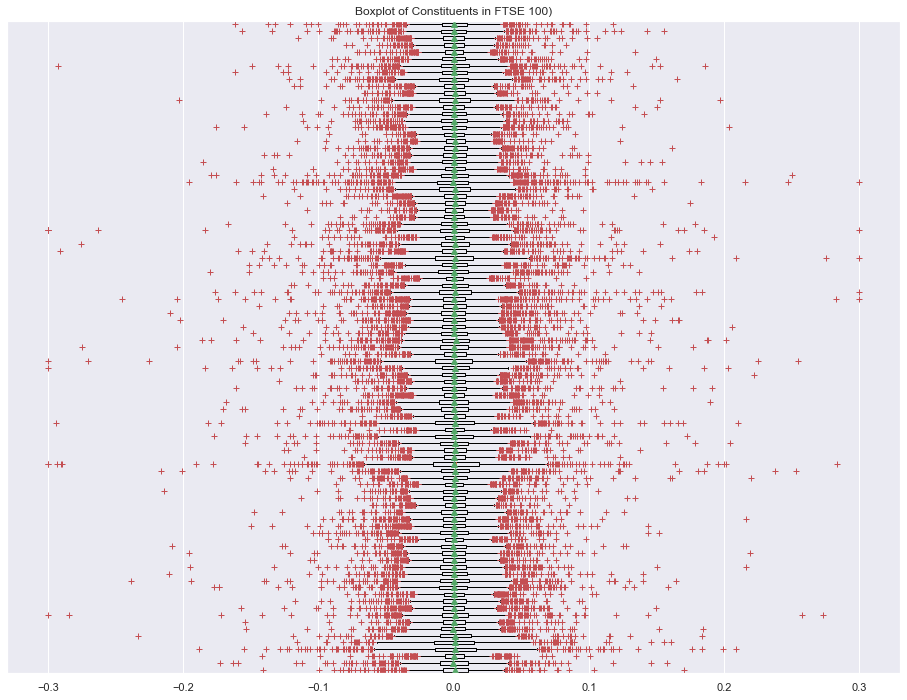

In [33]:
plt.figure(figsize=(16,12))
plt.title('Boxplot of Constituents in FTSE 100)')
plt.boxplot(con_ret,showmeans=True, vert=False, sym='r+');
plt.yticks([])
plt.show();

The benefits of windsorizing is that it preserves the information that a case had among the highest (or lowest) values in a distribution but protects against some of the harmful effects of outliers. 
 * The constituent simple returns has limited outliers and were windsorized to a max(min) of 30% return in a day
 * The ETF index simple returns are less volatile so outliers were windsorized to a max(min) of 5% return in a day

***

#### **2(c) Plot Cumulative Returns**

In [34]:
con_cret = f.price2cret(m_price)

In [35]:
mar_cret = f.price2cret(raw_m)

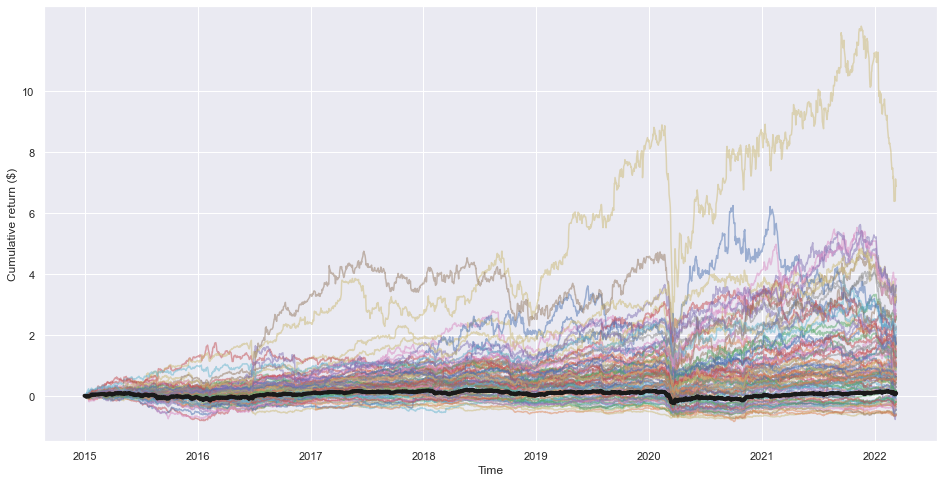

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(con_cret, linewidth=1.5, alpha=.5)
ax.plot(mar_cret, linewidth = 4, alpha=1, color = "k")
plt.ylabel('Cumulative return ($)')
plt.xlabel('Time')
plt.yticks(np.arange(0,12,2))
plt.show()

***

#### **2(d) Correlation Heatmap/Cluster Map**

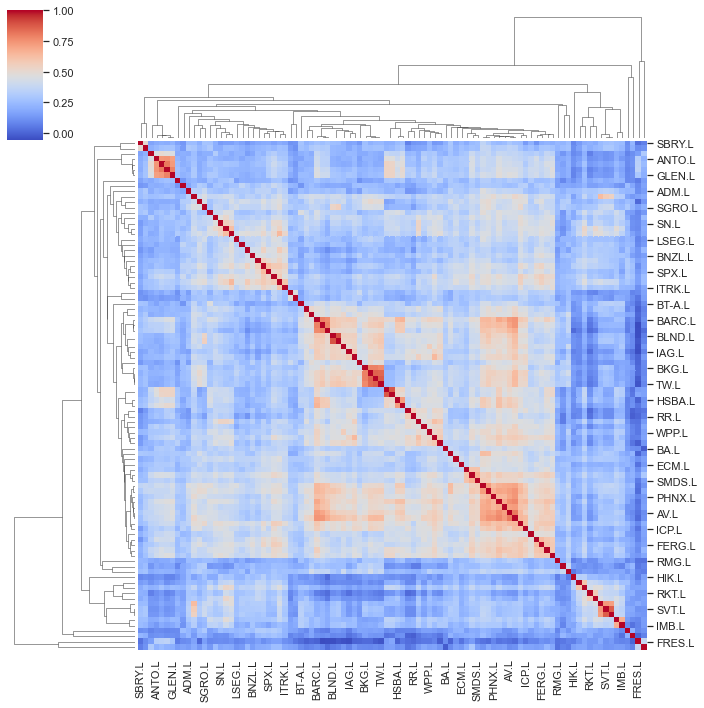

In [37]:
rho=con_ret.corr()
cluster = sns.clustermap(rho,
                   method='average',
                   #col_cluster=True,row_cluster=True,
                   #dendrogram_ratio=(.1, .2),
                   #row_colors=row_colors,
                   cmap="coolwarm",
                   metric='cosine')

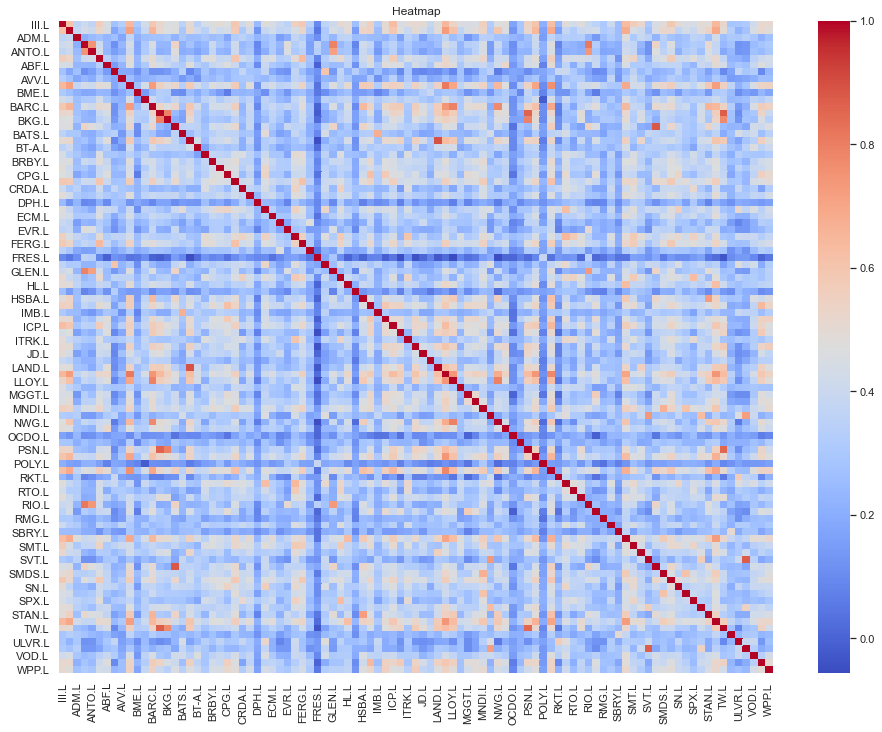

In [38]:
plt.figure(figsize=(16,12))
ax = sns.heatmap(rho,annot=False, cmap=plt.cm.coolwarm, fmt='2g')
ax.set_title('Heatmap')
plt.show()

***

#### 2(e) `Bonus Item: Sort By Sector`

In [39]:
data_table;

In [40]:
# For ASX 200
#df = data_table[0][['Sector', 'Code']]
#df

In [41]:
df = data_table[3][['EPIC', 'FTSE Industry Classification Benchmark sector[14]']]
df

EPIC FTSE Industry Classification Benchmark sector[14]
0    III                                Financial Services
1   ABDN                                Financial Services
2    ADM                                 Nonlife Insurance
3    AAF                                Telecommunications
4    AAL                                            Mining
..   ...                                               ...
95  ULVR                                    Personal Goods
96    UU                      Gas, Water & Multi-utilities
97   VOD                         Mobile Telecommunications
98   WTB                                Retail hospitality
99   WPP                                             Media

[100 rows x 2 columns]

In [42]:
#df.to_pickle('sector.pkl')
print(df['FTSE Industry Classification Benchmark sector[14]'].unique())
indi = df['FTSE Industry Classification Benchmark sector[14]'].unique()

['Financial Services' 'Nonlife Insurance' 'Telecommunications' 'Mining'
 'Support Services' 'Food Producers' 'Pharmaceuticals & Biotechnology'
 'Media' 'Software & Computer Services' 'Life Insurance' 'Retailers'
 'Aerospace & Defence' 'Banks' 'Household Goods & Home Construction'
 'Oil & Gas Producers' 'Tobacco' 'Real Estate Investment Trusts'
 'Fixed Line Telecommunications' 'Personal Goods' 'Beverages'
 'Construction & Materials' 'Chemicals' 'Health Care' 'Industrials'
 'Travel & Leisure' 'Industrial Metals & Mining'
 'Electronic & Electrical Equipment' 'Investment Services'
 'General Retailers' 'Asset Managers' 'Automobiles & Parts'
 'Forestry & Paper' 'Gas, Water & Multi-utilities' 'Food & Drug Retailers'
 'Precious Metals & Mining' 'Industrial Transportation'
 'Equity Investment Instruments' 'General Industrials'
 'Health Care Equipment & Services' 'Industrial Engineering' 'Electricity'
 'Mobile Telecommunications' 'Retail hospitality']


In [43]:
grouped_tickers = {}
for i in indi:
    grouped_tickers[i] = df[df['FTSE Industry Classification Benchmark sector[14]'] == i]

In [44]:
grouped_tickers

{'Financial Services':     EPIC FTSE Industry Classification Benchmark sector[14]
 0    III                                Financial Services
 1   ABDN                                Financial Services
 41    HL                                Financial Services
 56  LSEG                                Financial Services
 66   PSH                                Financial Services
 80   SDR                                Financial Services
 92   STJ                                Financial Services,
 'Nonlife Insurance':   EPIC FTSE Industry Classification Benchmark sector[14]
 2  ADM                                 Nonlife Insurance,
 'Telecommunications':   EPIC FTSE Industry Classification Benchmark sector[14]
 3  AAF                                Telecommunications,
 'Mining':     EPIC FTSE Industry Classification Benchmark sector[14]
 4    AAL                                            Mining
 5   ANTO                                            Mining
 37  FRES                     

**Comment**

I managed to sort the stocks by sector group, but failed to convert the dictionary back into a dataframe in order to pull return information needed for correlation/ clustermap.

***

#### `Split Data into Subgroups: In-Sample / Out-Of-Sample`

In [45]:
con_ret_in = con_ret['01/01/2015':'12/31/2020']
con_ret_out = con_ret['01/01/2021':'03/11/2022']

In [46]:
con_cret_in = con_cret['01/01/2015':'12/31/2020']
con_cret_out = con_cret['01/01/2021':'03/11/2022']

In [47]:
mar_ret_in = mar_ret['01/01/2015':'12/31/2020']
mar_ret_out = mar_ret['01/01/2021':'03/11/2022']

In [48]:
mar_cret_in = mar_cret['01/01/2015':'12/31/2020']
mar_cret_out = mar_cret['01/01/2021':'03/11/2022']

***

### **Part 3: Principal Component Analysis**

### **3(a) Perform PCA**

#### 3(a): i

In [49]:
# USING SKLEARN
sklearn_pca = PCA(n_components=20) # let's look at the first 20 components
pc = sklearn_pca.fit_transform(con_ret_in)

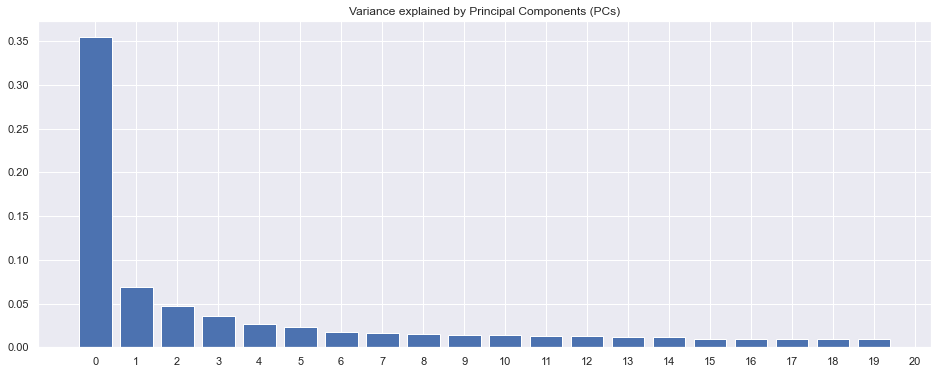

In [50]:
plt.bar(range(20),sklearn_pca.explained_variance_ratio_)
plt.title('Variance explained by Principal Components (PCs)')
plt.xticks(np.arange(0,21,1))
plt.show()

In [51]:
var_exp = sklearn_pca.explained_variance_ratio_
var_exp_1 = var_exp[0]
var_exp_1 # % of variance that PC1 explains

0.3551311646597136

***

#### 3(a): ii

In [52]:
cum_var_exp = np.cumsum(sklearn_pca.explained_variance_ratio_)
cum_var_exp

array([0.35513116, 0.42352797, 0.4703589 , 0.50585987, 0.53248736,
       0.55557133, 0.57331501, 0.58952237, 0.60480021, 0.6188178 ,
       0.63257706, 0.64521575, 0.6577234 , 0.66960165, 0.68089542,
       0.69092703, 0.70088013, 0.7104851 , 0.71985414, 0.72899714])

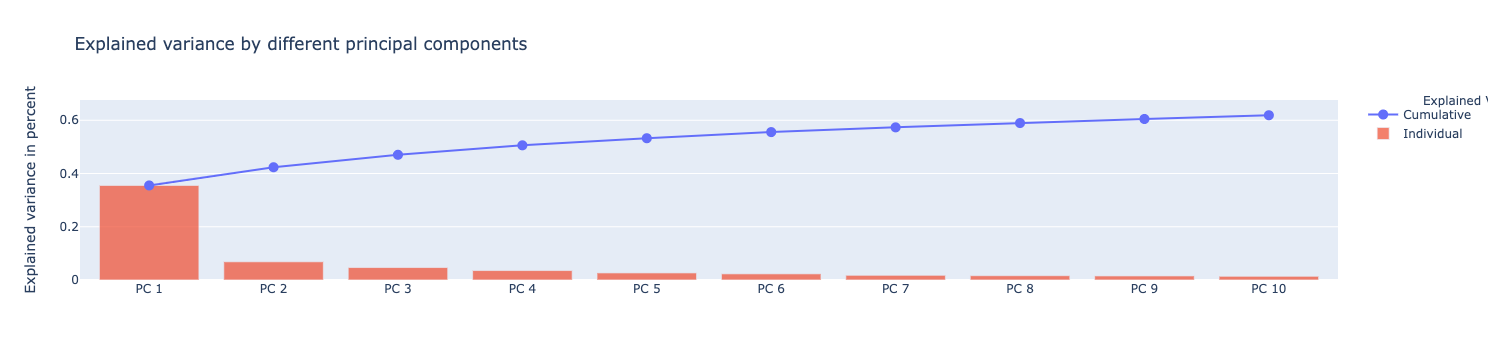

In [53]:
fig=go.Figure()
fig.add_trace(
    go.Scatter(
        x=['PC %s' %i for i in range(1,11)], 
        y=cum_var_exp,
        name='Cumulative',
        mode="markers+lines+text",
        marker=dict(symbol="circle",size=10)
    ))

fig.add_trace(
    go.Bar(
        x=['PC %s' %i for i in range(1,11)],
        y=var_exp,
        name='Individual',
        opacity=0.75
    ))


layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
        ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig.update_layout(layout)

fig.show()

In [54]:
var_exp = sklearn_pca.explained_variance_ratio_
var_exp_1 = var_exp[0]
var_exp_1 

0.3551311646597136

In [55]:
var_exp = sklearn_pca.explained_variance_ratio_
var_exp_2 = var_exp[1]
var_exp_2 

0.06839680778594996

***

#### 3(a): iii

Essentially we have included 'enough' principal components when the majority of information is effectively explained by the principal componenets. The ***scree plot*** above clearly shows that most of the variance (approx. 36%) can be explained by the first principal component alone. It is apparent that the second and third principal component still bears some information (6.8%,4.6%) yet the fourth onwards increasingly decay. Since they account for minimal variance they can be dropped without losing much information. Together, the first **two principal components** contain nearly half of the information so combined they should be ***enough*** to explain variation in the index dataset.

***

### **3(b) Construct Portfolio using weights derived by PC**

#### 3(b): i

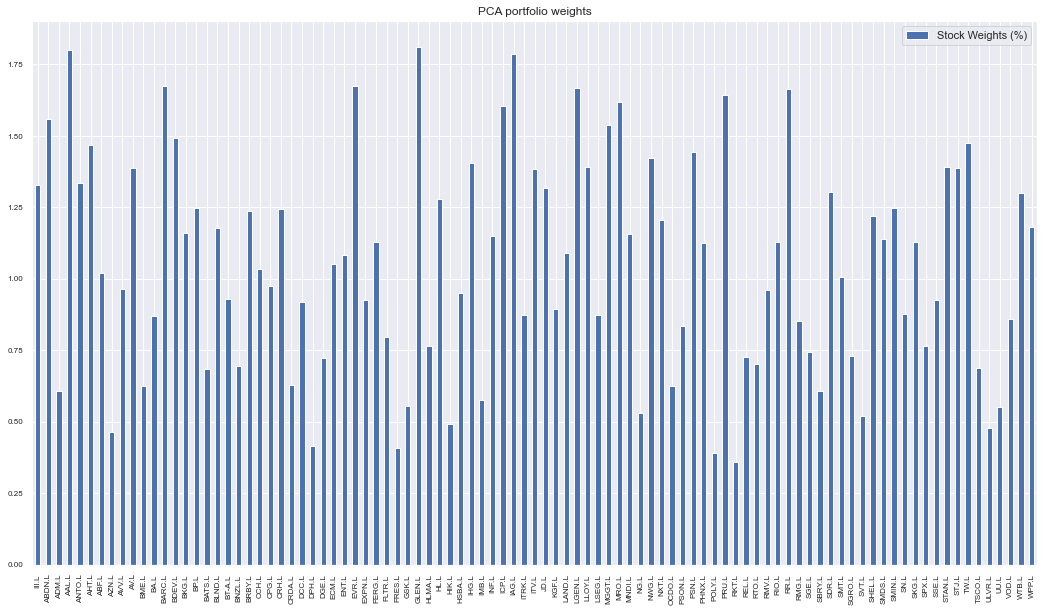

In [56]:
pcs =sklearn_pca.components_

# Select the PC you want to compare, for example, the first component (indexed at 0):
selectedPCcomponent_ID=0
selectedPCcomponent_name="PC1"

pc1 = pcs[selectedPCcomponent_ID,:]

# normalized it to ensure sum is equals to 1 - this way it can be used as portfolio weights
pc_w = np.asmatrix(pc1/sum(pc1)).T

# apply our selected principal componenet as weight of the stocks
pc1_ret = con_ret_in.values*pc_w

# plot the weights in the PC
weights_df = pd.DataFrame(data = pc_w*100,index = con_ret_in.columns)
weights_df.columns=['Stock Weights (%)']
weights_df.plot.bar(title='PCA portfolio weights',rot =90,fontsize =8, figsize=(18,10));

In [57]:
np.sum(pc_w*100) #Check weights sum to 100%

99.99999999999996

***

#### 3(b): ii

**Calculate the cumulative return of the portfolio and compare the PC portfolio return to the market return**


In [58]:
# plot the total return index of the PC portfolio
pc_ret_in = pd.DataFrame(data =pc1_ret, index= con_ret_in.index)
pc_ret_idx = ((1+pc_ret_in).cumprod()-1)
pc_ret_idx.columns =[selectedPCcomponent_name]

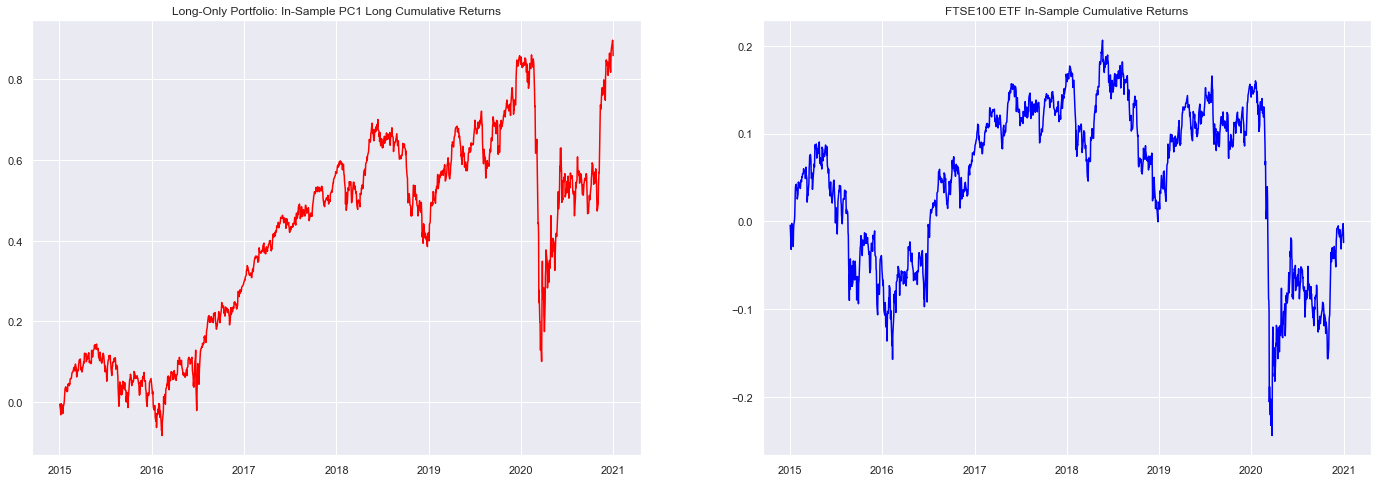

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24, 8))

ax1.plot(pc_ret_idx, c = 'red')
ax1.set_title("Long-Only Portfolio: In-Sample PC1 Long Cumulative Returns")

ax2.plot((mar_cret_in), c = 'blue')
ax2.set_title("FTSE100 ETF In-Sample Cumulative Returns")

plt.show()

In [60]:
f.test_corr(pc_ret_in,mar_ret_in["ISF.L"])

The Linear Correlation Coefficient for the two returns is 0.91.
The Ordinal Assosciation Kendall test for the two returns is 0.73.


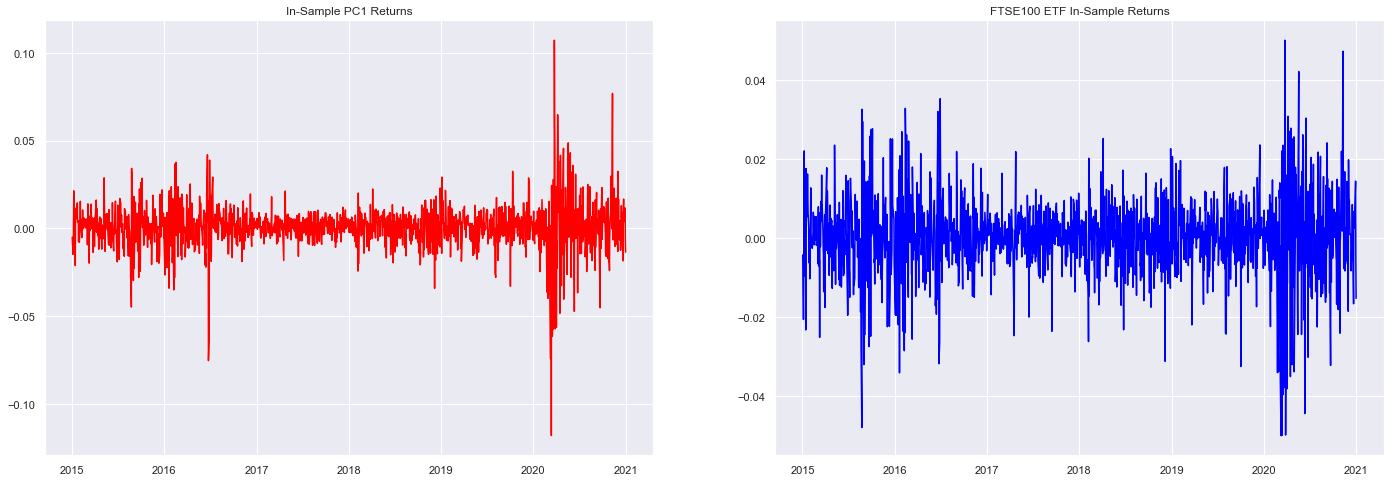

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24, 8))

ax1.plot(pc_ret_in, c = 'red')
ax1.set_title("In-Sample PC1 Returns")

ax2.plot((mar_ret_in), c = 'blue')
ax2.set_title("FTSE100 ETF In-Sample Returns")

plt.show()

The **Kendall Tau** statistic is used to measure the ordinal association between two measured quantities. A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient. Values close to 1 indicate strong agreement. Since our value is approx 73% it signifies that one principal component captures the majority of systematic variation in our data set.

**Discussion**
* Both correlation methods demonstrate strong correlation for the 1st principal component with the FTSE100 ETF. However, considering shock events such as COVID-19 it is likely the case that PC1 has little accountability for returns that were signficantly negative. This is represented in the signficantly lower correlation of cumulative returns.
* Considering this, it is suitable to observe the 2nd Principal component (as completed below) to discern whether it may increase the correlation with the index.

***

#### `Extra: ii (Principal Component 2)`

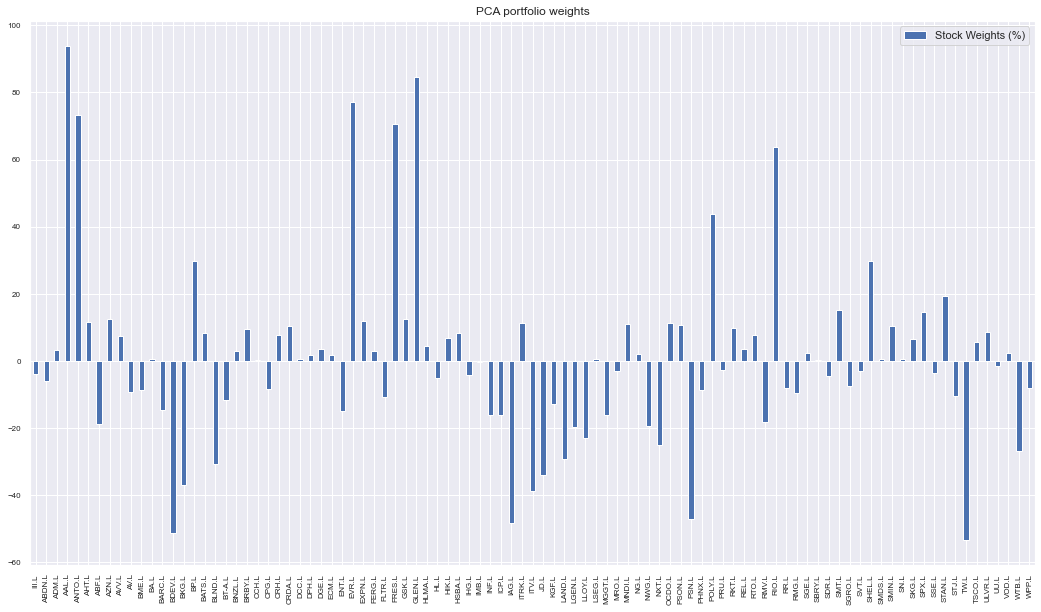

In [62]:
pcs =sklearn_pca.components_

# Select the PC you want to compare, for example, the first component (indexed at 0):
selectedPCcomponent_ID=1
selectedPCcomponent_name="PC2"

pc2 = pcs[selectedPCcomponent_ID,:]

# normalized it to ensure sum is equals to 1 - this way it can be used as portfolio weights
pc_w2 = np.asmatrix(pc2/sum(pc2)).T

# apply our selected principal componenet as weight of the stocks
pc2_ret = con_ret_in.values*pc_w2

# plot the weights in the PC
weights_df = pd.DataFrame(data = pc_w2*100,index = con_ret_in.columns)
weights_df.columns=['Stock Weights (%)']
weights_df.plot.bar(title='PCA portfolio weights',rot =90,fontsize =8, figsize=(18,10));

In [63]:
np.sum(pc_w*100) #Check weights sum to 100%

99.99999999999996

In [64]:
# plot the total return index of the PC portfolio
pc2_ret_in = pd.DataFrame(data =pc2_ret, index= con_ret_in.index)
pc_ret_idx = ((1+pc2_ret_in).cumprod()-1)
pc_ret_idx.columns =[selectedPCcomponent_name]

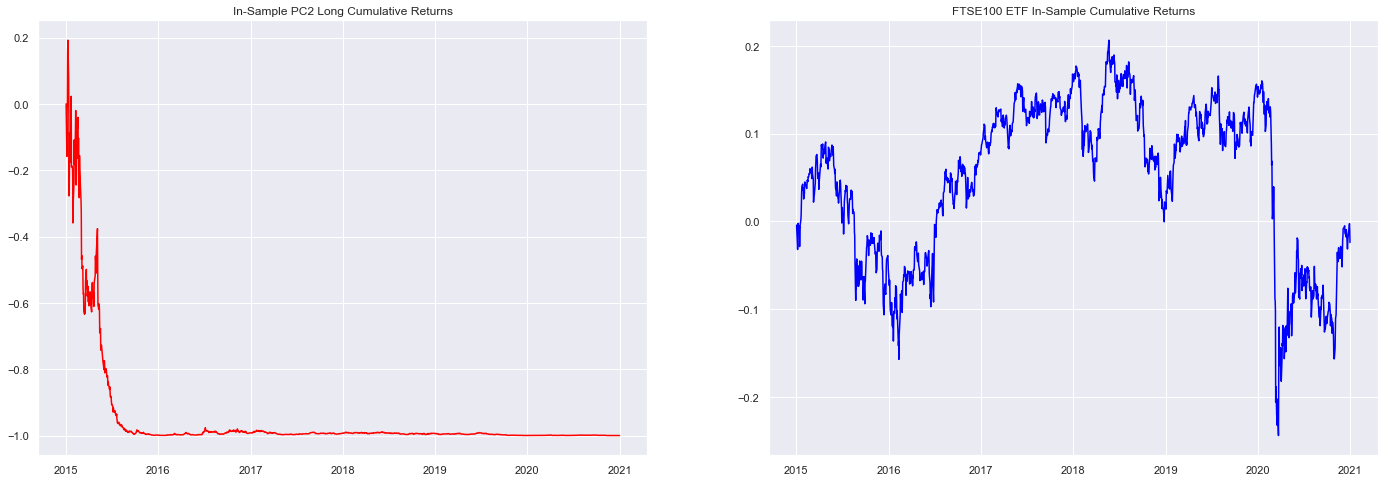

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24, 8))

ax1.plot(pc_ret_idx, c = 'red')
ax1.set_title("In-Sample PC2 Long Cumulative Returns")

ax2.plot((mar_cret_in), c = 'blue')
ax2.set_title("FTSE100 ETF In-Sample Cumulative Returns")

plt.show()

In [66]:
f.test_corr(pc2_ret_in,mar_ret_in["ISF.L"])

The Linear Correlation Coefficient for the two returns is 0.17.
The Ordinal Assosciation Kendall test for the two returns is 0.19.


**Discussion:**
The second PC maintains less correlation with the index (17%), however, it is a good indication that PC1 represents the maximum variance direction in the data but is insufficient in communicating the negative returns over the period. Generally speaking PC1 will usually equate to about the majority of market index returns. Therefore, the second PC should also be represented by a line in the K-dimensional variable space, which is orthogonal to the first PC. This line also passes through the average point, and if combined with PC1 should improve the approximation of the X-data.

***

#### 3(b) iii.

**Plot out-of-sample cumulative returns of portfolio and market**

99.99999999999996


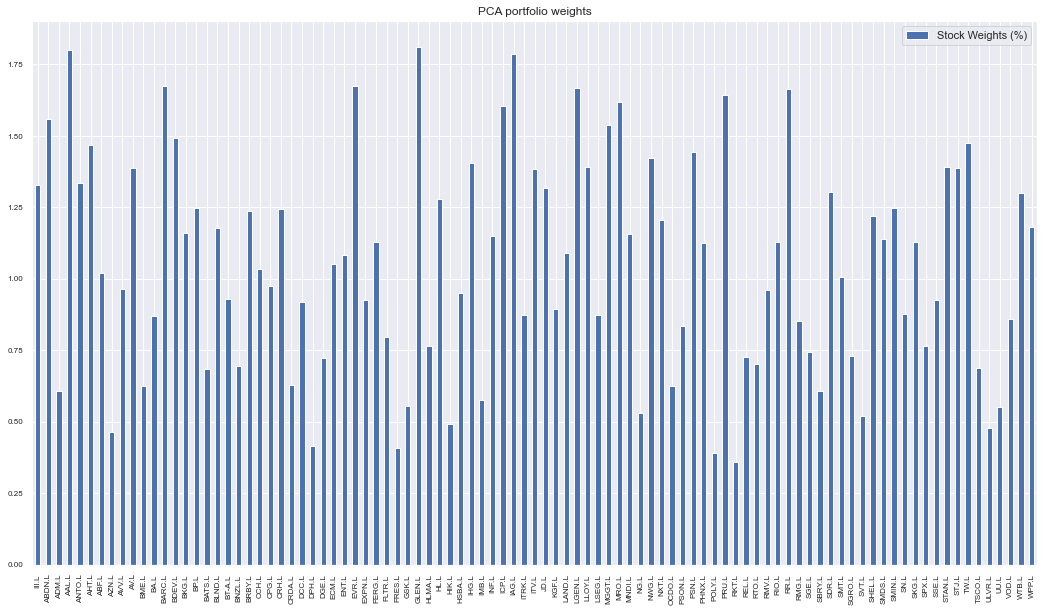

In [67]:
pcs =sklearn_pca.components_

# Select the PC you want to compare, for example, the first component (indexed at 0):
selectedPCcomponent_ID=0
selectedPCcomponent_name="PC1"

pc1 = pcs[selectedPCcomponent_ID,:]

# normalized it to ensure sum is equals to 1 - this way it can be used as portfolio weights
pc_w = np.asmatrix(pc1/sum(pc1)).T

# apply our selected principal componenet as weight of the stocks
pc1_ret = con_ret_out.values*pc_w

# plot the weights in the PC
weights_df = pd.DataFrame(data = pc_w*100,index = con_ret_out.columns)
weights_df.columns=['Stock Weights (%)']
weights_df.plot.bar(title='PCA portfolio weights',rot =90,fontsize =8, figsize=(18,10));

print(np.sum(pc_w*100)) #Check weights sum to 100%

In [68]:
# plot the total return index of the PC portfolio
pc_ret_out = pd.DataFrame(data =pc1_ret, index= con_ret_out.index)
pc_ret_idx = ((1+pc_ret_out).cumprod()-1)
pc_ret_idx.columns =[selectedPCcomponent_name]

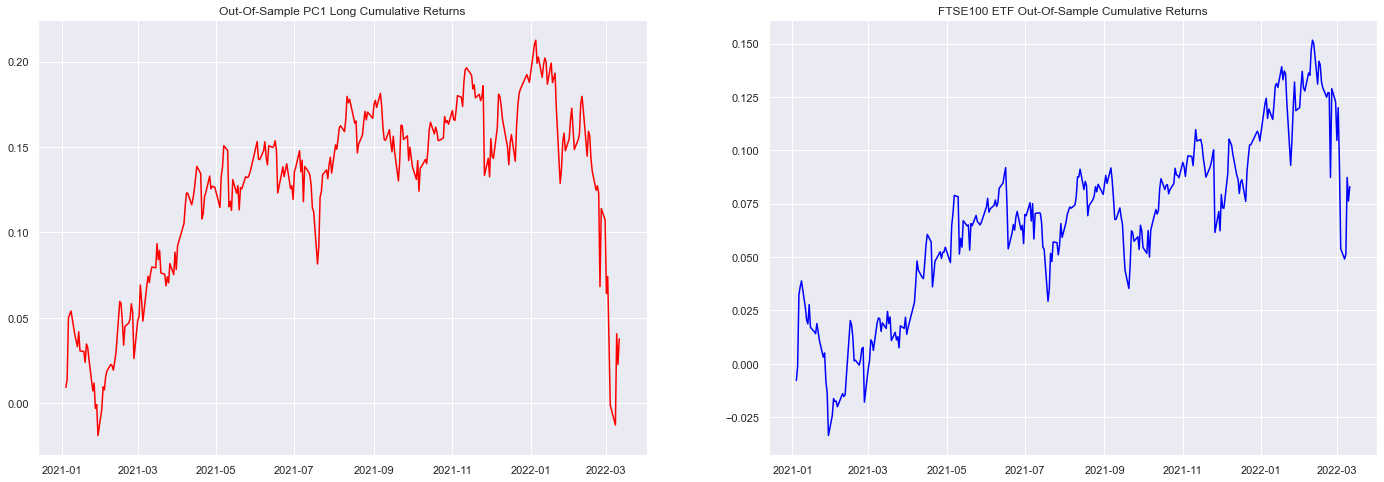

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24, 8))

ax1.plot(pc_ret_idx, c = 'red')
ax1.set_title("Out-Of-Sample PC1 Long Cumulative Returns")

ax2.plot((mar_cret_out), c = 'blue')
ax2.set_title("FTSE100 ETF Out-Of-Sample Cumulative Returns")

plt.show()

In [70]:
f.test_corr(pc_ret_out,mar_ret_out["ISF.L"]) #Correlation of simple returns

The Linear Correlation Coefficient for the two returns is 0.94.
The Ordinal Assosciation Kendall test for the two returns is 0.75.


***

#### 3(b) iv. Discuss Results Observed 

* **Visually:** the in-sample and out-of-sample cumulative returns follow a similar trend to the index. This indicates that PC1 demonstrates highly-dimensional data and tracks the general maximum variance direction over the entire period, however, it could be improved with PC2 which takes into account negative shocks to returns such as COVID-19. 
* **Correlation:** Statistical tests show that the linear correlation and ordinal assosciation are sufficient in explaining our index. 

Both the in-sample and out-of-sample portfolio derived from optimal PC1 weights present very strong visual and statistical correlation. This is unambiguous as PC1 is based on the highest variance explained in the index. The in-sample PC1 portfolio showed the strong average returns which is unsurprising as it was modelled based on weighting derived from PC1 (using all stocks and allocating the least negative weights to the best returns).

It is important to note that running a Principal Component Analysis using PC1 to compress the data onto a lower-dimensional feature subspace provides a strong correlation to the FTSE100 ETF but we could improve the dimensionality by considering PC2 to better indentify patterns in the dataset.


***

### **3(c) Construct Long-Only Portfolio using equal weights derived by PC1**

In [71]:
pca = PCA(1).fit(con_ret.fillna(0))
pc1 = pd.Series(index=con_ret_in.columns, data=pca.components_[0])

#### 3(c) i. 
Equally weighted portfolio for top 10 largest PC1 weights

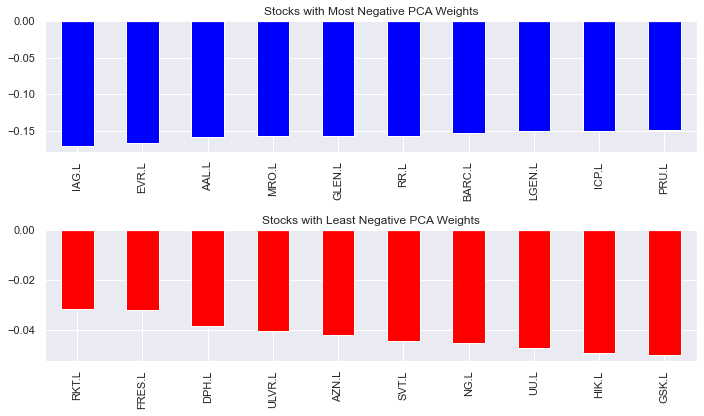

In [72]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], 
                           color='blue', 
                           grid=True, 
                           title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], 
                          color='red', 
                          grid=True, 
                          title='Stocks with Least Negative PCA Weights')
plt.tight_layout()

**Reasons for most negative vs least negative**

* Notice from the figure that the **least negative** stocks such as (RKT,FFRES,DPH, ULVR) are in consumer goods, mining, and pharmaceutical sectors. Considering COVID-19's impact and  general market condition's this makes complete sense, as these sectors benefited from the boost in sales from such things as quarantine measures and demand/access to raw materials (low interest rates + boredom in quarantine = lots of people want to build/renovate homes)

* On the other hand, the **most negative** stocks such as the Internation Airlines Group (IAG.L) and EVR.L (Russian Oligarch run Mining firm) are unsurprisingly the most negative due to factors such as Covid-19 and the Ukrainian-Russian war. These businesses profits and investment oppurtunities were knocked out with restrictions to travel, and the UK backlash to Russian invasion resulting in large divestment from Russian related firms.

These weighting factors become important when considering the results of the portfolios below.

***

#### 3(c) ii. Long-Only: In-Sample

In [73]:
# Long portfolio; In-Sample
lp_ret_in = con_ret_in[pc1.nlargest(10).index].mean(1) # equally weighted portfolo from the 10 stocks
lp_cret_in = ((1+lp_ret_in).cumprod()-1)

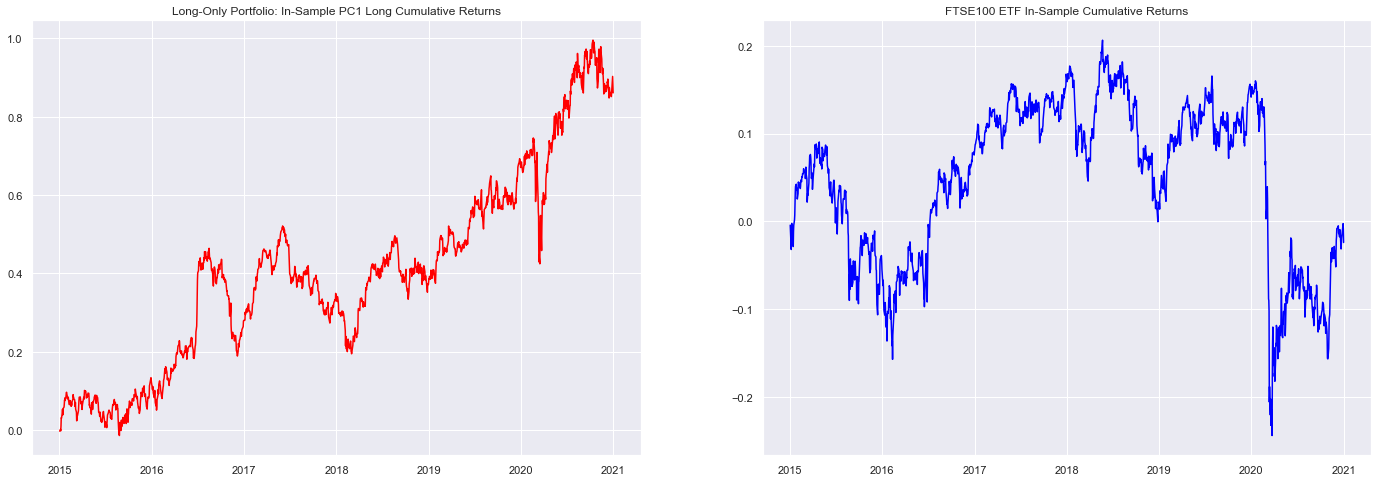

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24, 8))

ax1.plot(lp_cret_in, c = 'red')
ax1.set_title("Long-Only Portfolio: In-Sample PC1 Long Cumulative Returns")

ax2.plot((mar_cret_in), c = 'blue')
ax2.set_title("FTSE100 ETF In-Sample Cumulative Returns")

plt.show()

In [75]:
f.test_corr(lp_ret_in.to_frame(), mar_ret_in["ISF.L"])

The Linear Correlation Coefficient for the two returns is 0.66.
The Ordinal Assosciation Kendall test for the two returns is 0.47.


***

#### 3(c) iii. Long-Only: Out-Of-Sample

In [76]:
# Long portfolio; Out-Of-Sample
lp_ret_out = con_ret_out[pc1.nlargest(10).index].mean(1) # equally weighted portfolo from the 10 stocks
lp_cret_out = ((1+lp_ret_out).cumprod()-1)

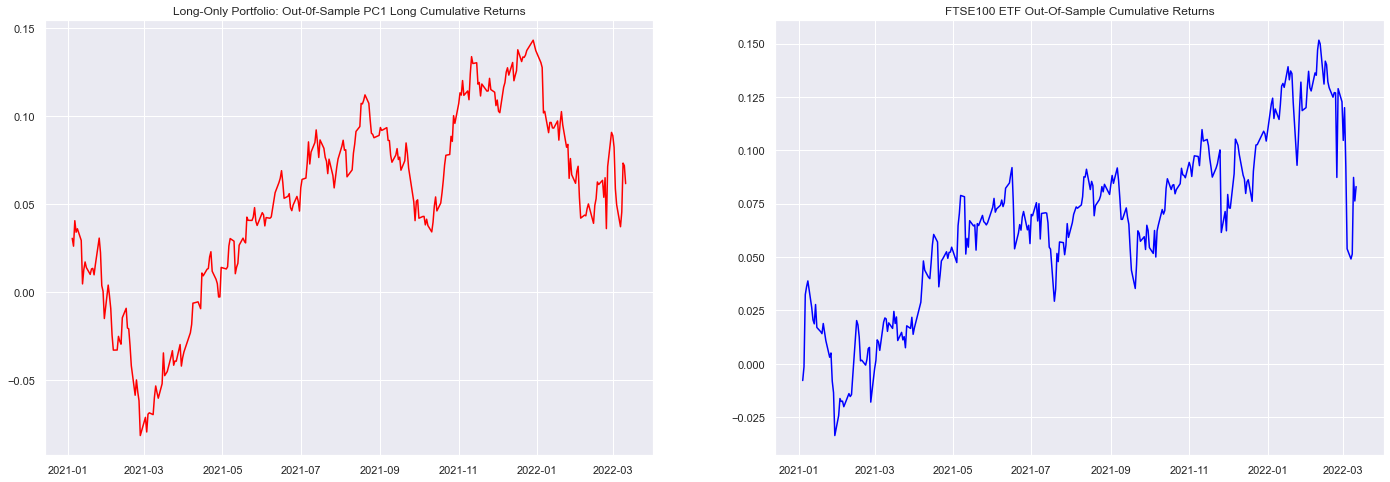

In [77]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24, 8))

ax1.plot(lp_cret_out, c = 'red')
ax1.set_title("Long-Only Portfolio: Out-0f-Sample PC1 Long Cumulative Returns")

ax2.plot((mar_cret_out), c = 'blue')
ax2.set_title("FTSE100 ETF Out-Of-Sample Cumulative Returns")

plt.show()

In [78]:
f.test_corr(lp_ret_out.to_frame(), mar_ret_out["ISF.L"])

The Linear Correlation Coefficient for the two returns is 0.52.
The Ordinal Assosciation Kendall test for the two returns is 0.30.


***

#### 3(c) iv. Long-Only: Discuss Results

* **Visually:** the in-sample constituents returns based on least negative equal weights show a much higher cumulative increase over the period. Coherent with previous dicussion going long only for optimal portfoio choice for stocks with positive expectancy understandbly results in strong average return of 11.53%. The in-sample and out-of-sample cumulative returns follow a similar trend to the index. This indicates that PC1 demonstrates highly-dimensional data and tracks the general maximum variance direction over the entire period, however, it could be improved with PC2 which takes into account negative shocks to returns such as COVID-19. 
* **Correlation:** Statistical tests show that the linear correlation (approx 60-50%) and ordinal assosciation (50-30%) are sufficient in explaining our index over the entire dataset. The correlation decreases as a result of less explainability of returns using merely 10 stocks (based on largest weight) compared to an index of 100.
* **Volatility:** Shown in the table summary the long only portfolio had a standard deviation of 13% in sample. Going long on 10 stocks shows lower (better) volatilty than our other models. It is likely the case that these stocks are in similar sectors and were not affected by shocks to returns such as Covid19.
* **Reward-to-Variability:** The sharpe ratio of 73.83% in-sample and 44.45% out-of-sample demonstrates the conceptual risk adjusted return of modern portfolio theory. Adding diversification (more stocks) should increase the Sharpe ratio compared to similar portfolios with a lower level of diversification. However, in this case it isn't upheld likely as the high returns are the result of optimal selection rather than too much risk.


***

### **3(d) Construct Long-Short Portfolio using equal weights derived by PC1**

#### 3(d) i. Long-Short Weights

In [79]:
ls_w = [-1,]*10+[1,]*10
ls_w

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [80]:
ls_ret_in = (con_ret_in[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ls_w).mean(1)
ls_cret_in = ((1+ls_ret_in).cumprod()-1)

***

#### 3(d) ii. Plot and compare In-sample Long Short Portfolio with the Index

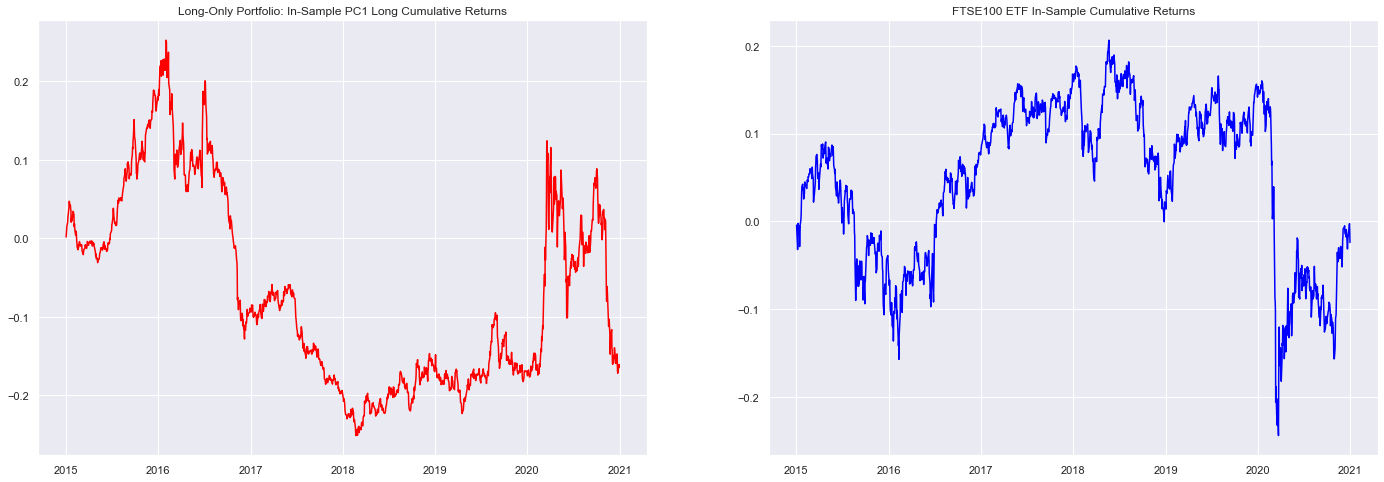

In [81]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24, 8))

ax1.plot(ls_cret_in, c = 'red')
ax1.set_title("Long-Only Portfolio: In-Sample PC1 Long Cumulative Returns")

ax2.plot((mar_cret_in), c = 'blue')
ax2.set_title("FTSE100 ETF In-Sample Cumulative Returns")

plt.show()

In [82]:
f.test_corr(ls_ret_in.to_frame(), mar_ret_in["ISF.L"])

The Linear Correlation Coefficient for the two returns is -0.51.
The Ordinal Assosciation Kendall test for the two returns is -0.29.


***

#### 3(d) ii. Plot and compare Out-of-Sample Long Short with Index

In [83]:
ls_ret_out = (con_ret_out[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ls_w).mean(1)
ls_cret_out = ((1+ls_ret_out).cumprod()-1)

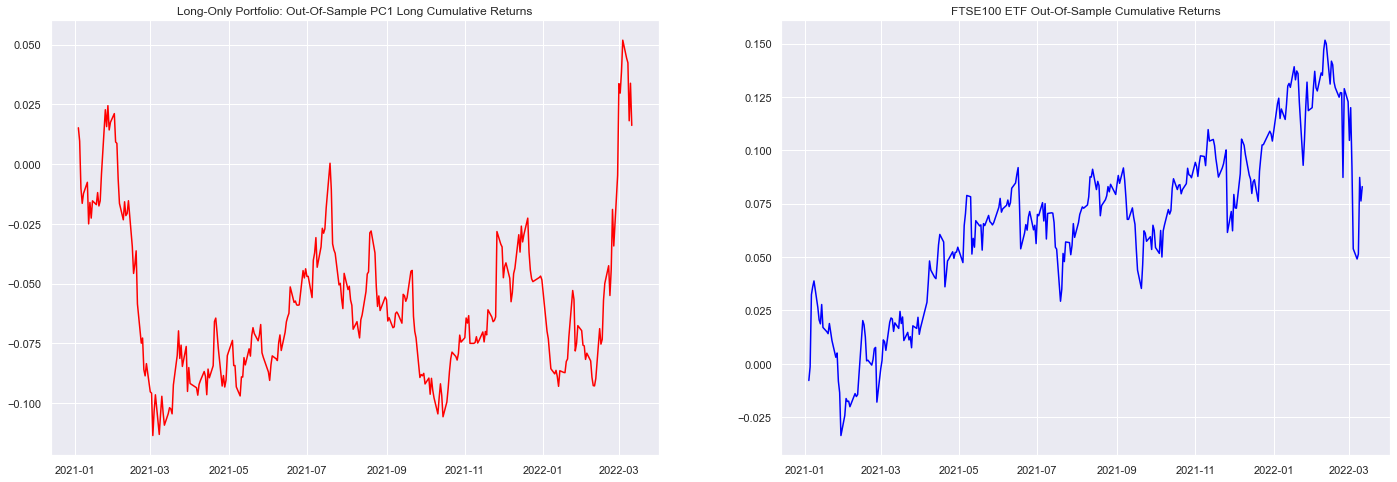

In [84]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(24, 8))

ax1.plot(ls_cret_out, c = 'red')
ax1.set_title("Long-Only Portfolio: Out-Of-Sample PC1 Long Cumulative Returns")

ax2.plot((mar_cret_out), c = 'blue')
ax2.set_title("FTSE100 ETF Out-Of-Sample Cumulative Returns")

plt.show()

In [85]:
f.test_corr(ls_ret_out.to_frame(), mar_ret_out["ISF.L"])

The Linear Correlation Coefficient for the two returns is -0.63.
The Ordinal Assosciation Kendall test for the two returns is -0.41.


***

#### 3(d) iv. Long-Short: Discuss Results

* **Correlation:** Negative correlation is a relationship between two variables in which one variable increases as the other decreases. Clearly our stats demonstrate an strong negative correlation. A likely reason for the negative correlation is the short positions which place equally extreme weights within the portfolio. As a repercussion when general price movement increases our long-short portfolio decreases. (i.e. Minimal concentration, highly sensitive to investment universe- the short will likely underperform the long)
* **Returns:** The long short portfolio maintains the worst average return both in and out of sample for reasons discussed above.
* **Reward-to-Variability:** The sharpe ratio does not convey any useful meaning as returns were negative. Therein, the negative returns did not compensate for any risk.

***

#### **3(e) Summary of Results**

In [86]:
f.table_info(mar_ret_in['ISF.L']) #Market In-Sample

Average Return = 2.02%
Std Dev = 16.52%
Sharpe = 12.22%


In [87]:
f.table_info(mar_ret_out['ISF.L']) #Market Out-of-Sample

Average Return = 9.75%
Std Dev = 14.58%
Sharpe = 66.89%


In [88]:
f.table_info(pc_ret_in[0]) # 3(b) PC1 returns In-Sample

Average Return = 12.35%
Std Dev = 20.26%
Sharpe = 60.96%


In [89]:
f.table_info(pc_ret_out[0]) # 3(b) PC1 returns Out-Of-Sample

Average Return = 4.78%
Std Dev = 18.42%
Sharpe = 25.95%


In [90]:
f.table_info(lp_ret_in) #3(c) Long-Only Portfolio In-Sample

Average Return = 11.53%
Std Dev = 15.62%
Sharpe = 73.83%


In [91]:
f.table_info(lp_ret_out) #3(c) Long-Only Portfolio Out-Of-Sample

Average Return = 5.88%
Std Dev = 13.22%
Sharpe = 44.45%


In [92]:
f.table_info(ls_ret_in) #3(d) Long-Short Portfolio In-Sample

Average Return = -1.88%
Std Dev = 14.73%
Sharpe = -12.76%


In [93]:
f.table_info(ls_ret_out) #3(d) Long-Short Portfolio Out-Of-Sample

Average Return = 2.48%
Std Dev = 15.14%
Sharpe = 16.38%


***

| Portfolio:   |              | In-Sample:    |               |              | Out-Of-Sample: |               |
|----------------|--------------|-----------------|---------------|--------------|------------------|---------------|
| :              | Avg. Return: | Std. Deviation: | Sharpe Ratio: | Avg. Return: | Std. Deviation:  | Sharpe Ratio: |
| Market Index   | 2.02%        | 16.52%          | 12.22%        | 9.75%        | *14.58%*         | **66.89%**    |
| Portfolio 3(b) | **12.35%**   | 20.26%          | *60.96%*      | 4.78%        | 18.42%           | 25.95%        |
| Portfolio 3(c) | 11.53%       | *15.62%*        | **73.83%**    | 5.88%        | **13.22%**       | 44.45%        |
| Portfolio 3(d) | -1.88%       | **14.73%**      | -12.76%       | 2.48%        | 15.14%           | 16.38%        |
| Portfolio 4(a) | *12.19%*     | 22.76%          | 54.23%        | **12.19%**   | 22.76%           | 54.23%        |
| Portfolio 4(b) | 11.11%       | 21.03%          | 53.49%        | *11.11%*     | 21.03%           | *53.49%*      |

***

### **Part 4: K-Means Algorithm**

#### **4(a) Select appropriate number of cluster... call this K**

In [94]:
returns = con_ret.mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']

returns['Volatility'] = con_ret.std() * sqrt(252)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [95]:
returns

Returns  Volatility
III.L   0.183075    0.290137
ABDN.L -0.088906    0.337298
ADM.L   0.118665    0.229389
AAL.L   0.283770    0.489852
ANTO.L  0.181980    0.399843
...          ...         ...
ULVR.L  0.090228    0.212124
UU.L    0.084197    0.225454
VOD.L   0.001552    0.250175
WTB.L   0.013130    0.338098
WPP.L   0.049263    0.304964

[95 rows x 2 columns]

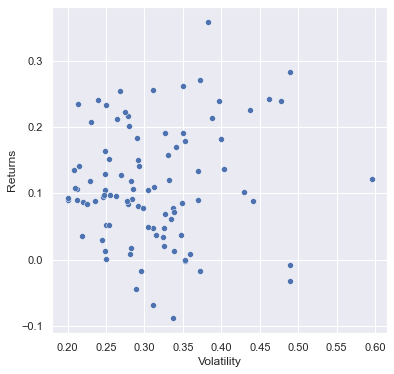

In [96]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=returns, x="Volatility", y="Returns");

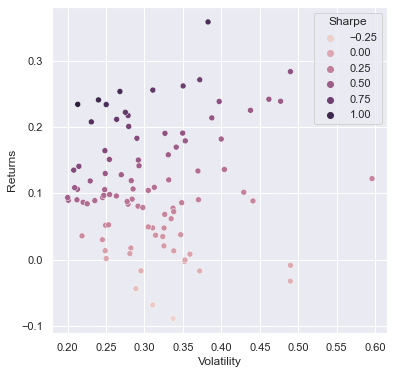

In [97]:
plt.figure(figsize=(6,6))
sharpe = returns.eval("Returns / Volatility").rename("Sharpe")
sns.scatterplot(data=returns, x="Volatility", y="Returns", hue=sharpe);

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

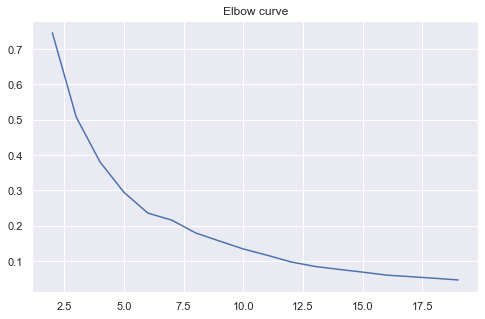

In [98]:
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks

The **Elbow Curve** can highlight the number of clusters we choose, and the Sum of Squared Errors (SSE) resulting from using that number of clusters. 

We then plot this relationship to help us identify the optimal number of clusters to use – we would prefer a lower number of clusters, but also would prefer the SSE to be lower – so this trade off needs to be taken into account.

So we can sort of see that once the number of clusters reaches 5 (on the bottom axis), the reduction in the SSE begins to slow down for each increase in cluster number. This would lead me to believe that the optimal number of clusters for this exercise lies around the 5 mark.

In [99]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

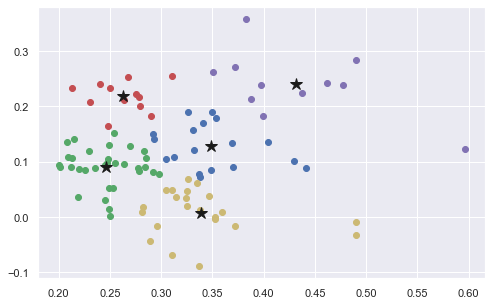

<Figure size 576x360 with 0 Axes>

In [100]:
# The example code directly above was taked from an online tutorial, clearly we would want returns on y-axis and volatility on x-axis)
id_Xaxis=1;
id_Yaxis=0;
plt.figure(figsize=(8, 5))
plot(data[idx==0,id_Xaxis],data[idx==0,id_Yaxis],'ob', # 'ob' means use symbol 'o' (b)lue color, y=yellow, r=red
     data[idx==1,id_Xaxis],data[idx==1,id_Yaxis],'oy', # s=square; *=star, etc....
     data[idx==2,id_Xaxis],data[idx==2,id_Yaxis],'or',
     data[idx==3,id_Xaxis],data[idx==3,id_Yaxis],'og',
     data[idx==4,id_Xaxis],data[idx==4,id_Yaxis],'om')
plot(centroids[:,id_Xaxis],centroids[:,id_Yaxis],'*k',markersize=12) # plot cluster centroids using black stars
plt.figure(figsize=(8, 5))
show()

In [101]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('III.L', 2)
('ABDN.L', 1)
('ADM.L', 3)
('AAL.L', 4)
('ANTO.L', 4)
('AHT.L', 4)
('ABF.L', 1)
('AZN.L', 3)
('AVV.L', 4)
('AV.L', 1)
('BME.L', 3)
('BA.L', 3)
('BARC.L', 1)
('BDEV.L', 0)
('BKG.L', 0)
('BP.L', 1)
('BATS.L', 3)
('BLND.L', 1)
('BT-A.L', 1)
('BNZL.L', 3)
('BRBY.L', 1)
('CCH.L', 3)
('CPG.L', 3)
('CRH.L', 0)
('CRDA.L', 3)
('DCC.L', 3)
('DPH.L', 2)
('DGE.L', 3)
('ECM.L', 2)
('ENT.L', 4)
('EVR.L', 4)
('EXPN.L', 2)
('FERG.L', 2)
('FLTR.L', 0)
('FRES.L', 0)
('GSK.L', 3)
('GLEN.L', 4)
('HLMA.L', 2)
('HL.L', 0)
('HIK.L', 0)
('HSBA.L', 3)
('IHG.L', 0)
('IMB.L', 3)
('INF.L', 0)
('ICP.L', 4)
('IAG.L', 1)
('ITRK.L', 3)
('ITV.L', 1)
('JD.L', 4)
('KGF.L', 1)
('LAND.L', 1)
('LGEN.L', 0)
('LLOY.L', 1)
('LSEG.L', 2)
('MGGT.L', 0)
('MRO.L', 4)
('MNDI.L', 3)
('NG.L', 3)
('NWG.L', 1)
('NXT.L', 1)
('OCDO.L', 4)
('PSON.L', 1)
('PSN.L', 0)
('PHNX.L', 3)
('POLY.L', 0)
('PRU.L', 1)
('RKT.L', 3)
('REL.L', 3)
('RTO.L', 2)
('RMV.L', 2)
('RIO.L', 0)
('RR.L', 1)
('RMG.L', 0)
('SGE.L', 3)
('SBRY.L', 3)
('S

In [102]:
info = pd.DataFrame(details)
info.columns = ['EPIC', 'Cluster_num']
info.head()

EPIC  Cluster_num
0   III.L            2
1  ABDN.L            1
2   ADM.L            3
3   AAL.L            4
4  ANTO.L            4

#### **4(b) Create 1000 Equally Weighted Portfolios** $$Conditional Assignment$$

In [116]:
#Stratified Sampling
np.random.seed(0)
sims = pd.DataFrame(index = range(1000), columns=['Returns','Volatility'])

for port in range(1000):
    
    stocks = {}

    for i in range(5): # for i in  K
        stocks[ info[info['Cluster_num'] == i].reset_index(drop='True').iloc[np.random.choice(len(info[info['Cluster_num']==i]))-1]['EPIC'] ] =  i
        
        #storage[ all stock in cluster i.loc[random number in range of all stock in cluster i][get stock name]] = cluster i
         
        
    portret = (con_ret[ list(stocks.keys())]/len(stocks.keys()) ).sum(axis=1)

    sims.loc[port,'Returns']= portret.mean() * 252
    sims.loc[port,'Volatility']= portret.std() * sqrt(252)
    sims.loc[port, 'Sharpe']= sims.loc[port,'Returns'] / sims.loc[port,'Volatility']
    
sims

Returns Volatility    Sharpe
0     0.14456   0.227097  0.636557
1    0.109708   0.192125  0.571026
2    0.148367   0.201413  0.736630
3    0.129972   0.242867  0.535155
4    0.141875   0.225434  0.629340
..        ...        ...       ...
995  0.147084   0.207128  0.710111
996  0.165155   0.213523  0.773474
997   0.11988   0.221942  0.540142
998  0.124024   0.188874  0.656647
999  0.109883   0.256066  0.429118

[1000 rows x 3 columns]

In [117]:
stocks

{'CRH.L': 0, 'PRU.L': 1, 'SMT.L': 2, 'VOD.L': 3, 'EVR.L': 4}

In [118]:
mean_ret = sims['Returns'].mean()
mean_ret

0.1374500908742064

In [119]:
mean_std = sims['Volatility'].mean()
mean_std

0.2184176005543506

In [120]:
mean_std = sims['Sharpe'].mean()
mean_std

0.6335178408630698

***

#### **4(c) Create 1000 Equally Weighted Portfolios $$Unconditional Assignment$$**

In [108]:
np.random.seed(0)
sim_random=pd.DataFrame([np.random.choice(list(info['EPIC']), 5, replace=False) for i in range(1000)])
r_sim = pd.DataFrame(index = range(1000), columns=['Returns','Volatility'])

for I in sim_random.index:
    r_sim.loc[I,'Returns'] = ((con_ret[list( sim_random.iloc[I] ) ] / len(sim_random.columns)).sum(axis=1)).mean()*252
    r_sim.loc[I,'Volatility'] = ((con_ret[list( sim_random.iloc[I] ) ] / len(sim_random.columns)).sum(axis=1)).std()*sqrt(252)

r_sim['Sharpe'] = r_sim['Returns']/r_sim['Volatility']
r_sim

Returns Volatility    Sharpe
0     0.09274   0.230063  0.403108
1     0.07698   0.265794  0.289622
2    0.057529    0.21862  0.263145
3     0.04762   0.217232  0.219212
4    0.115538   0.185456  0.622996
..        ...        ...       ...
995  0.021666   0.219283  0.098805
996  0.119742   0.210829   0.56796
997  0.121952   0.193319  0.630833
998  0.053001   0.224415  0.236175
999  0.127856   0.158541  0.806454

[1000 rows x 3 columns]

In [109]:
mean_ret_random = r_sim['Returns'].mean()
mean_ret_random

0.11116773410760675

In [110]:
std_ret_random = r_sim['Volatility'].mean()
std_ret_random

0.21025289552259918

In [111]:
sharpe_ret_random = r_sim['Sharpe'].mean()
sharpe_ret_random

0.5349270391190325

#### **4(c) i. Results Summary Table**

| Portfolio:   |              | In-Sample:    |               |              | Out-Of-Sample: |               |
|----------------|--------------|-----------------|---------------|--------------|------------------|---------------|
| :              | Avg. Return: | Std. Deviation: | Sharpe Ratio: | Avg. Return: | Std. Deviation:  | Sharpe Ratio: |
| Market Index   | 2.02%        | 16.52%          | 12.22%        | 9.75%        | *14.58%*         | **66.89%**    |
| Portfolio 3(b) | *12.35%*   | 20.26%          | 60.96%      | 4.78%        | 18.42%           | 25.95%        |
| Portfolio 3(c) | 11.53%       | *15.62%*        | **73.83%**    | 5.88%        | **13.22%**       | 44.45%        |
| Portfolio 3(d) | -1.88%       | **14.73%**      | -12.76%       | 2.48%        | 15.14%           | 16.38%        |
| Portfolio 4(a) | **13.75%**     | 21.84%          | *63.34%*        | **13.75%**    | 21.84%           | *63.34%*|
| Portfolio 4(b) | 11.11%       | 21.03%          | 53.49%        | *11.11%*     | 21.03%           | 53.49%      |

***

#### **4(d) Distribution Plots**

##### **4(d) i. Average Returns**

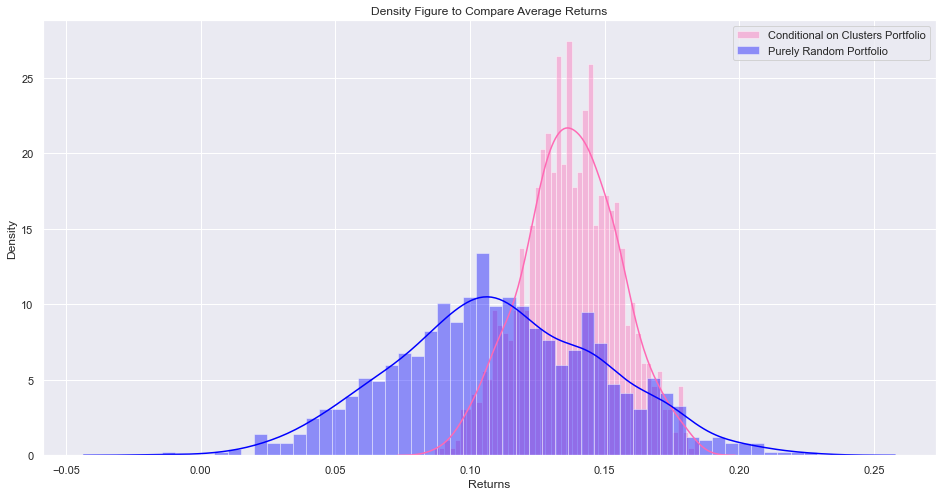

In [121]:
f.dist_plot(sims['Returns'],r_sim['Returns'],"Density Figure to Compare Average Returns")

***

##### **4(d) ii. Standard Deviation**

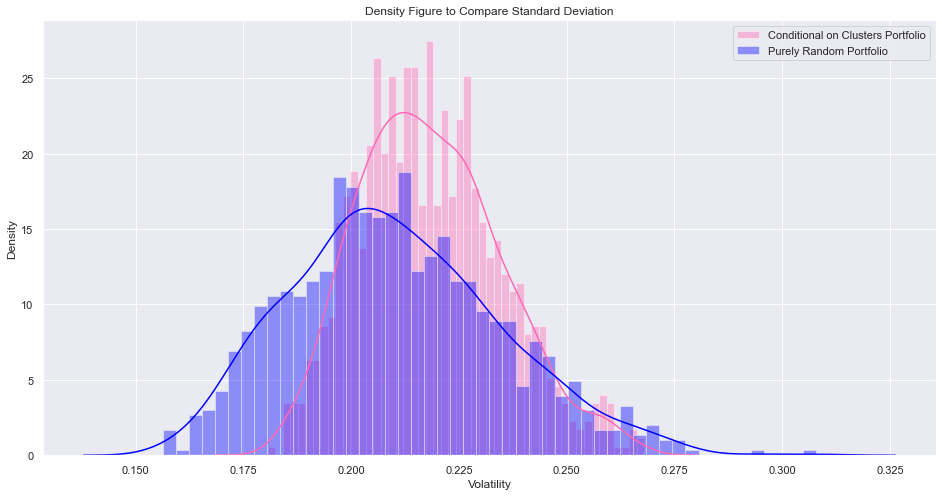

In [122]:
f.dist_plot(sims['Volatility'],r_sim['Volatility'],"Density Figure to Compare Standard Deviation")

***

##### **4(d) iii. Reward-To-Variability**

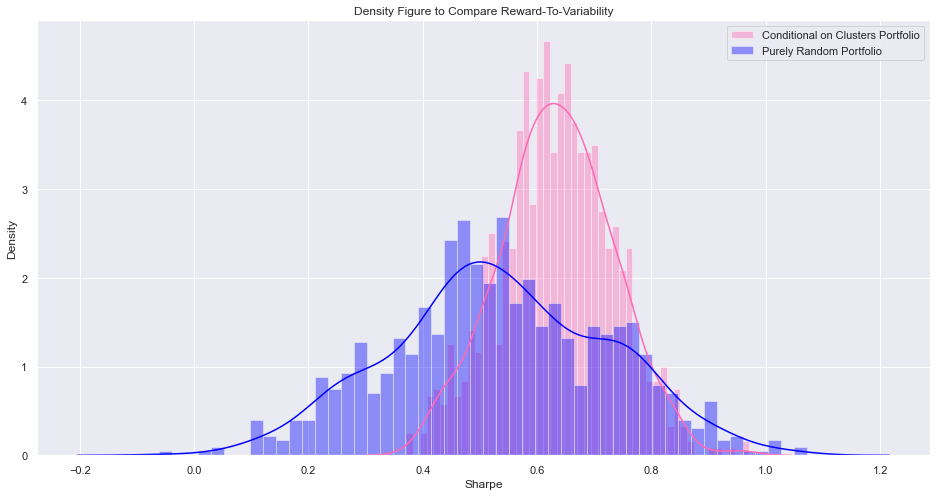

In [123]:
f.dist_plot(sims['Sharpe'],r_sim['Sharpe'],"Density Figure to Compare Reward-To-Variability")

***

##### **4(d) iv. Comparison and Diversification Discussion**

* The figure of comparitive returns shows that the randomly selected conditional cluster were slightly higher on average with 12.9%. The condition of the 1000 clusters was that they were required to select one out of the five K-mean clusters (one of which accounted for a high pool of risk/return stocks). Conceptually, the efficient market hypothesis claims that higher riskiness (standard deviation) should be compensated for higher returns. Therefore, imposing the condition it forces each portfolio to reach out and account for this risky profile. Hence, the plots show a slight increase in returns and standard deviation, which is pushed higher than the unconditional portfolios. Conversely, the 1000 random unconditional portfolios select at random without replacement. If we observe the clusters below, the majority of stocks fall within the low risk -low return range. Therein, selecting at random increases the probability of a pool of stocks with lower variance from one another. Moreover, stocks in the same cluster are more likely to be related with one another (undiversified). For example, many stocks are in the non-discretionary consumer goods (food, water, medicine) sector which all share relatively low risk and return profiles as they will mostly operate regardless of external influence.

* Diversification is best presented through the reward-to-variability ratio (Sharpe). Conditional cluster portfolios are shown to outperform unconditional portfolios Sharpe ratio over the period. Modern Portfolio Theory support that increasing diversity of assets (e.g. taking conditional clusters with different variance and returns) is an effective way to get higher reward-variability ratios. The correlation between stocks is likely a driving measure of clustering. However, correlation should change during period of financial stress such as COVID19 and Russias' Invasion of Ukraine. Since, the FTSE100 ETF market has experienced these stressors, it suggests the clusters are no longer being structurally sound when risk is high.

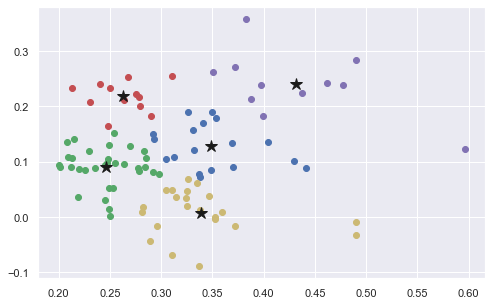

<Figure size 576x360 with 0 Axes>

In [115]:
id_Xaxis=1;
id_Yaxis=0;
plt.figure(figsize=(8, 5))
plot(data[idx==0,id_Xaxis],data[idx==0,id_Yaxis],'ob', # 'ob' means use symbol 'o' (b)lue color, y=yellow, r=red
     data[idx==1,id_Xaxis],data[idx==1,id_Yaxis],'oy', # s=square; *=star, etc....
     data[idx==2,id_Xaxis],data[idx==2,id_Yaxis],'or',
     data[idx==3,id_Xaxis],data[idx==3,id_Yaxis],'og',
     data[idx==4,id_Xaxis],data[idx==4,id_Yaxis],'om')
plot(centroids[:,id_Xaxis],centroids[:,id_Yaxis],'*k',markersize=12) # plot cluster centroids using black stars
plt.figure(figsize=(8, 5))
show()